In [1]:
%matplotlib notebook
import numpy as np
import pandas
import matplotlib.pyplot as plt

from sedkcorr.sed_fitting import lephare

In [2]:
data_mag = {"mag_FUV":24.34941529151189, "mag_FUV.err":0.2808529712437018, "mag_NUV":23.131763356831183,
        "mag_NUV.err":0.09311475654141255, "mag_u":20.91321870241184, "mag_u.err":0.17575489046042136,
        "mag_g":19.027929430034394, "mag_g.err":0.011213086618905521, "mag_r":18.131317367139847,
        "mag_r.err":0.008302712573136972, "mag_i":17.708476613246482, "mag_i.err":0.008509995022562222,
        "mag_z":17.381505953770187, "mag_z.err":0.027499037334056453, "CONTEXT":127, "Z-SPEC":0.05821464776210461,
        "STRING":"SN2006ob"}

data_flux = {"flux_FUV":8.418119645517397e-18, "flux_FUV.err":2.143661908713681e-18, 
             "flux_NUV":1.1382562931688215e-17, "flux_NUV.err":9.604776017815744e-19, 
             "flux_u":3.6405973425498647e-17, "flux_u.err":5.8105758510391525e-18, 
             "flux_g":1.199744512838845e-16, "flux_g.err":1.2645403391975792e-18, 
             "flux_r":1.5925481408070496e-16, "flux_r.err":1.2303613829159515e-18, 
             "flux_i":1.5973227540346776e-16, "flux_i.err":1.2616792254120978e-18, 
             "flux_z":1.5282070538096207e-16, "flux_z.err":3.938851888085081e-18,
             "CONTEXT":127, "Z-SPEC":0.05821464776210461, "STRING":"SN2006ob"}


In [3]:
try:
    data_mag = pandas.DataFrame(data_mag)
except(ValueError):
    for k, v in data_mag.items():
        data_mag[k] = [v]
    data_mag = pandas.DataFrame(data_mag)

data_mag

,mag_FUV,mag_FUV.err,mag_NUV,mag_NUV.err,mag_u,mag_u.err,mag_g,mag_g.err,mag_r,mag_r.err,mag_i,mag_i.err,mag_z,mag_z.err,CONTEXT,Z-SPEC,STRING
0,24.349415,0.280853,23.131763,0.093115,20.913219,0.175755,19.027929,0.011213,18.131317,0.008303,17.708477,0.00851,17.381506,0.027499,127,0.058215,SN2006ob


In [4]:
try:
    data_flux = pandas.DataFrame(data_flux)
except(ValueError):
    for k, v in data_flux.items():
        data_flux[k] = [v]
    data_flux = pandas.DataFrame(data_flux)

data_flux

,flux_FUV,flux_FUV.err,flux_NUV,flux_NUV.err,flux_u,flux_u.err,flux_g,flux_g.err,flux_r,flux_r.err,flux_i,flux_i.err,flux_z,flux_z.err,CONTEXT,Z-SPEC,STRING
0,8.418120e-18,2.143662e-18,1.138256e-17,9.604776e-19,3.640597e-17,5.810576e-18,1.199745e-16,1.264540e-18,1.592548e-16,1.230361e-18,1.597323e-16,1.261679e-18,1.528207e-16,3.938852e-18,127,0.058215,SN2006ob


In [5]:
test_fit = lephare.LePhareSEDFitter()

In [6]:
test_fit.set_data(data=data_flux, 
                  results_path="/Users/mart1/Desktop/Libraries/sedkcorr/test/lephare/data.out", 
                  flux_unit="AA")

In [7]:
test_fit.describe_params("input")

STAR_SED : $LEPHAREDIR/sed/STAR/STAR_MOD.list (comented? : False)
STAR_FSCALE : 3.432E-09 (comented? : False)
STAR_LIB : LIB_STAR (comented? : False)
QSO_SED : $LEPHAREDIR/sed/QSO/QSO_MOD.list (comented? : False)
QSO_FSCALE : 1 (comented? : False)
QSO_LIB : LIB_QSO (comented? : False)
GAL_SED : $LEPHAREDIR/sed/GAL/BC03_CHAB/BC03_MOD.list (comented? : False)
GAL_FSCALE : 1. (comented? : False)
GAL_LIB : LIB_BC03 (comented? : False)
SEL_AGE : $LEPHAREDIR/sed/GAL/BC03_CHAB/BC03_AGE.list (comented? : False)
AGE_RANGE : 0.,13.55e9 (comented? : False)
FILTER_LIST : galex/FUV.pb,galex/NUV.pb,sdss/up.pb,sdss/gp.pb,sdss/rp.pb,sdss/ip.pb,sdss/zp.pb (comented? : False)
TRANS_TYPE : 0 (comented? : False)
FILTER_CALIB : 0 (comented? : False)
FILTER_FILE : galex_sdss.filt (comented? : False)
STAR_LIB_IN : LIB_STAR (comented? : False)
STAR_LIB_OUT : STAR (comented? : False)
QSO_LIB_IN : LIB_QSO (comented? : False)
QSO_LIB_OUT : QSO (comented? : False)
GAL_LIB_IN : LIB_BC03 (comented? : False)
GAL_LIB

In [8]:
#test_fit.run_filter()

In [9]:
#test_fit.run_sedtolib()

In [10]:
#test_fit.run_mag_star()

In [11]:
#test_fit.run_mag_gal()

In [12]:
#test_fit.run_zphota()

In [13]:
test_fit.run_fit(change_context=["u", "g", "r", "i", "z"])

<IPython.core.display.Javascript object>


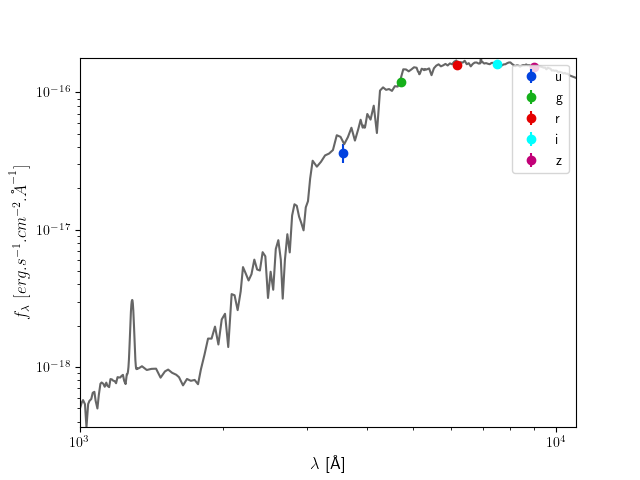

{'ax': <matplotlib.axes._subplots.AxesSubplot at 0x1823beab38>,
 'fig': <Figure size 640x480 with 1 Axes>}

In [14]:
test_fit.show(id_sed=0, y_unit="AA", plot_phot=True, xlim=(1000, 11000), ylim=(None, None), 
              savefile=None, xscale="log", yscale="log")

In [19]:
test_fit.write("/Users/mart1/Desktop/test.dat", None)

In [26]:
testp = pandas.read_csv("/Users/mart1/Desktop/test.dat", sep=" ")
testp

,lbda,mag_id_0
0,132.27683,31.714640
1,138.62612,31.535819
2,144.97541,31.231772
3,154.49934,30.318083
4,159.79041,30.123507
5,167.19791,29.943849
6,171.43077,29.845570
7,176.72185,29.723550
8,186.24578,29.524319
9,190.47864,29.439774


In [25]:
testp.shape

(1050, 1)

In [28]:
testp.rename(columns={"toto":"t0t0"}, inplace=True)
testp

,lbda,mag_id_0
0,132.27683,31.714640
1,138.62612,31.535819
2,144.97541,31.231772
3,154.49934,30.318083
4,159.79041,30.123507
5,167.19791,29.943849
6,171.43077,29.845570
7,176.72185,29.723550
8,186.24578,29.524319
9,190.47864,29.439774


In [15]:
test2 = lephare.LePhareRand()

In [16]:
NB_DRAW = 100
test2.set_data(data=data_flux, 
               results_path="/Users/mart1/Desktop/Libraries/sedkcorr/test/lephare/data_rand.out", 
               flux_unit="AA", 
               nb_draw=NB_DRAW)

In [17]:
test2.data_rand

,flux_FUV,flux_FUV.err,flux_NUV,flux_NUV.err,flux_u,flux_u.err,flux_g,flux_g.err,flux_r,flux_r.err,flux_i,flux_i.err,flux_z,flux_z.err,CONTEXT,Z-SPEC,STRING_0
0,5.685028e-30,1.693608e-30,2.071007e-29,1.718477e-30,1.177122e-28,2.459157e-29,8.842626e-28,9.393165e-30,2.011404e-27,1.569970e-29,2.984380e-27,2.367286e-29,3.984000e-27,1.055023e-28,127,0.058215,SN2006ob
1,5.828579e-30,1.693608e-30,2.402691e-29,1.718477e-30,1.484991e-28,2.459157e-29,9.014967e-28,9.393165e-30,2.026157e-27,1.569970e-29,2.982565e-27,2.367286e-29,4.038508e-27,1.055023e-28,127,0.058215,SN2006ob
2,6.194999e-30,1.693608e-30,2.193088e-29,1.718477e-30,1.097483e-28,2.459157e-29,8.841308e-28,9.393165e-30,2.059066e-27,1.569970e-29,2.988586e-27,2.367286e-29,4.195523e-27,1.055023e-28,127,0.058215,SN2006ob
3,6.576265e-30,1.693608e-30,1.951053e-29,1.718477e-30,1.408155e-28,2.459157e-29,8.859688e-28,9.393165e-30,2.035372e-27,1.569970e-29,2.970572e-27,2.367286e-29,4.106997e-27,1.055023e-28,127,0.058215,SN2006ob
4,6.815500e-30,1.693608e-30,1.628040e-29,1.718477e-30,1.391762e-28,2.459157e-29,8.860592e-28,9.393165e-30,2.023368e-27,1.569970e-29,2.988216e-27,2.367286e-29,4.153459e-27,1.055023e-28,127,0.058215,SN2006ob
5,4.647373e-30,1.693608e-30,2.017592e-29,1.718477e-30,1.464137e-28,2.459157e-29,8.913596e-28,9.393165e-30,2.014084e-27,1.569970e-29,2.969249e-27,2.367286e-29,4.077586e-27,1.055023e-28,127,0.058215,SN2006ob
6,7.810728e-30,1.693608e-30,1.959275e-29,1.718477e-30,1.331985e-28,2.459157e-29,8.999615e-28,9.393165e-30,2.042893e-27,1.569970e-29,2.970031e-27,2.367286e-29,4.217690e-27,1.055023e-28,127,0.058215,SN2006ob
7,6.492895e-30,1.693608e-30,1.980692e-29,1.718477e-30,1.427120e-28,2.459157e-29,8.962615e-28,9.393165e-30,2.024728e-27,1.569970e-29,2.987874e-27,2.367286e-29,4.003521e-27,1.055023e-28,127,0.058215,SN2006ob
8,5.648203e-30,1.693608e-30,2.061865e-29,1.718477e-30,2.020999e-28,2.459157e-29,9.039114e-28,9.393165e-30,2.033401e-27,1.569970e-29,2.971664e-27,2.367286e-29,4.037081e-27,1.055023e-28,127,0.058215,SN2006ob
9,9.509750e-30,1.693608e-30,1.786267e-29,1.718477e-30,1.721524e-28,2.459157e-29,9.124357e-28,9.393165e-30,2.037183e-27,1.569970e-29,3.023264e-27,2.367286e-29,4.029692e-27,1.055023e-28,127,0.058215,SN2006ob


In [18]:
test_fit.describe_params("input")

STAR_SED : $LEPHAREDIR/sed/STAR/STAR_MOD.list (comented? : False)
STAR_FSCALE : 3.432E-09 (comented? : False)
STAR_LIB : LIB_STAR (comented? : False)
QSO_SED : $LEPHAREDIR/sed/QSO/QSO_MOD.list (comented? : False)
QSO_FSCALE : 1 (comented? : False)
QSO_LIB : LIB_QSO (comented? : False)
GAL_SED : $LEPHAREDIR/sed/GAL/BC03_CHAB/BC03_MOD.list (comented? : False)
GAL_FSCALE : 1. (comented? : False)
GAL_LIB : LIB_BC03 (comented? : False)
SEL_AGE : $LEPHAREDIR/sed/GAL/BC03_CHAB/BC03_AGE.list (comented? : False)
AGE_RANGE : 0.,13.55e9 (comented? : False)
FILTER_LIST : galex/FUV.pb,galex/NUV.pb,sdss/up.pb,sdss/gp.pb,sdss/rp.pb,sdss/ip.pb,sdss/zp.pb (comented? : False)
TRANS_TYPE : 0 (comented? : False)
FILTER_CALIB : 0 (comented? : False)
FILTER_FILE : galex_sdss.filt (comented? : False)
STAR_LIB_IN : LIB_STAR (comented? : False)
STAR_LIB_OUT : STAR (comented? : False)
QSO_LIB_IN : LIB_QSO (comented? : False)
QSO_LIB_OUT : QSO (comented? : False)
GAL_LIB_IN : LIB_BC03 (comented? : False)
GAL_LIB

In [19]:
test2.run_fit(change_context=["u", "g", "r", "i", "z"])

<IPython.core.display.Javascript object>


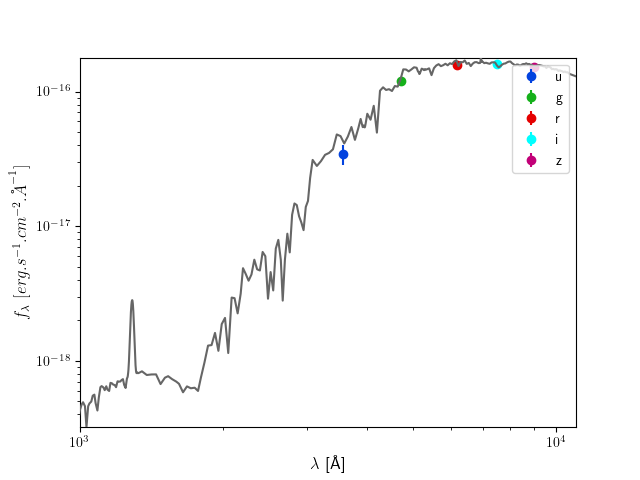

{'ax': <matplotlib.axes._subplots.AxesSubplot at 0x182122be10>,
 'fig': <Figure size 640x480 with 1 Axes>}

In [20]:
test2.show(id_sed=24, y_unit="AA", plot_phot=True, xlim=(1000, 11000), ylim=(None, None), 
           savefile=None, xscale="log", yscale="log")

<IPython.core.display.Javascript object>


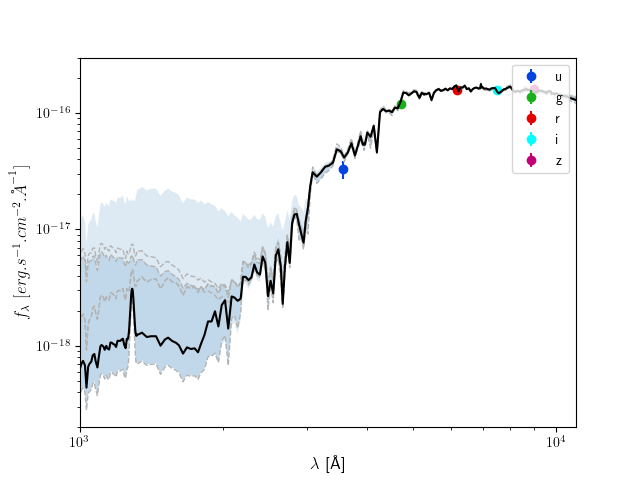

In [21]:
dict_ax = test2.show(id_sed=None, y_unit="AA", plot_phot=True, xlim=(1000, 11000), ylim=(None, None), 
                     savefile=None, xscale="log", yscale="log", zorder=5, color="k")
for _id_sed in np.random.choice(list(test2.data_sed.keys()), 5):
    test2.show(dict_ax["ax"], id_sed=int(_id_sed), y_unit="AA", plot_phot=False, xlim=(1000, 11000), 
               ylim=(2e-19, 3e-16), savefile=None, xscale="log", yscale="log", ls="--", lw=1, color="0.7", zorder=2)

In [22]:
test2_res = test2.data_res
test2_res

,IDENT,Z_BEST,CHI_BEST,MOD_BEST,EXTLAW_BEST,EBV_BEST,DIST_MOD_BEST,NBAND_USED,Z_SEC,CHI_SEC,...,MASS_MED,MASS_SUP,SFR_BEST,SFR_INF,SFR_MED,SFR_SUP,SSFR_BEST,SSFR_INF,SSFR_MED,SSFR_SUP
0,0,0.0582,7.451720,19,1,0.15,37.0792,5,-99.0,1.000000e+09,...,9.79637,9.89835,-8.57937,-4.27178,-2.91738,-1.753730,-18.1753,-16.1244,-13.2096,-11.6692
1,1,0.0582,3.449070,20,1,0.15,37.0792,5,-99.0,1.000000e+09,...,9.78153,9.88759,-2.40434,-4.08821,-2.42810,-1.525440,-11.9936,-15.4710,-12.6190,-11.3832
2,2,0.0582,7.819250,21,0,0.00,37.0792,5,-99.0,1.000000e+09,...,9.85632,9.94686,-3.94665,-4.24509,-3.14539,-1.874410,-13.9199,-15.3173,-13.2664,-11.8368
3,3,0.0582,3.198750,10,1,0.05,37.0792,5,-99.0,1.000000e+09,...,9.80768,9.90961,-99.00000,-4.21559,-2.77525,-1.649750,-108.9420,-15.3976,-12.9661,-11.5260
4,4,0.0582,3.870740,10,1,0.05,37.0792,5,-99.0,1.000000e+09,...,9.81313,9.91250,-99.00000,-4.08208,-2.71175,-1.576340,-108.9420,-14.7889,-12.6501,-11.4315
5,5,0.0582,3.514940,11,1,0.15,37.0792,5,-99.0,1.000000e+09,...,9.79241,9.89434,-3.67204,-4.08985,-2.43843,-1.516960,-13.2789,-15.3655,-12.6053,-11.3637
6,6,0.0582,5.273620,10,1,0.05,37.0792,5,-99.0,1.000000e+09,...,9.81841,9.91649,-99.00000,-4.08799,-2.79040,-1.671240,-108.9450,-15.3683,-13.0031,-11.5528
7,7,0.0582,3.759020,19,1,0.15,37.0792,5,-99.0,1.000000e+09,...,9.78241,9.88772,-7.75306,-4.21977,-2.48482,-1.589300,-17.3097,-16.1098,-12.6792,-11.4673
8,8,0.0582,0.312870,13,1,0.10,37.0792,5,-99.0,1.000000e+09,...,9.77639,9.87562,-1.52813,-3.39068,-1.59244,-0.822251,-11.3954,-13.9411,-11.5067,-10.5835
9,9,0.0582,1.937640,10,1,0.15,37.0792,5,-99.0,1.000000e+09,...,9.77386,9.87964,-11.18490,-3.74767,-2.09792,-0.895066,-20.7672,-14.7854,-12.0199,-10.7661


In [23]:
test2_res.columns

Index(['IDENT', 'Z_BEST', 'CHI_BEST', 'MOD_BEST', 'EXTLAW_BEST', 'EBV_BEST',
       'DIST_MOD_BEST', 'NBAND_USED', 'Z_SEC', 'CHI_SEC', 'MOD_SEC', 'Z_QSO',
       'CHI_QSO', 'MOD_QSO', 'MOD_STAR', 'CHI_STAR', 'MAG_OBS_FUV',
       'MAG_OBS_NUV', 'MAG_OBS_u', 'MAG_OBS_g', 'MAG_OBS_r', 'MAG_OBS_i',
       'MAG_OBS_z', 'ERR_MAG_OBS_FUV', 'ERR_MAG_OBS_NUV', 'ERR_MAG_OBS_u',
       'ERR_MAG_OBS_g', 'ERR_MAG_OBS_r', 'ERR_MAG_OBS_i', 'ERR_MAG_OBS_z',
       'MAG_MOD_FUV', 'MAG_MOD_NUV', 'MAG_MOD_u', 'MAG_MOD_g', 'MAG_MOD_r',
       'MAG_MOD_i', 'MAG_MOD_z', 'K_COR_FUV', 'K_COR_NUV', 'K_COR_u',
       'K_COR_g', 'K_COR_r', 'K_COR_i', 'K_COR_z', 'MAG_ABS_FUV',
       'MAG_ABS_NUV', 'MAG_ABS_u', 'MAG_ABS_g', 'MAG_ABS_r', 'MAG_ABS_i',
       'MAG_ABS_z', 'MABS_FILT_FUV', 'MABS_FILT_NUV', 'MABS_FILT_u',
       'MABS_FILT_g', 'MABS_FILT_r', 'MABS_FILT_i', 'MABS_FILT_z', 'CONTEXT',
       'ZSPEC', 'STRING_INPUT', 'MASS_BEST', 'MASS_INF', 'MASS_MED',
       'MASS_SUP', 'SFR_BEST', 'SFR_INF', 'SFR_MED'

In [24]:
np.mean(test2_res.SSFR_MED)

-12.450035

In [25]:
np.std(test2_res.SSFR_MED)

0.5539512724734912

In [12]:
type(-1)

int

In [29]:
testp = pandas.DataFrame({"a":[], "b":[]})
testp

,a,b


In [36]:
pandas.DataFrame({"a":3, "b":4}, index=[2])

,a,b
2,3,4


In [37]:
testd = {"a":[], "b":[]}

In [38]:
for k, v in testd.items():
    v = [1, 2, 3]
testd

{'a': [], 'b': []}

In [39]:
testp = pandas.DataFrame({"a":[1, 2, 3], "b":[4, 5, 6]})
testp

,a,b
0,1,4
1,2,5
2,3,6


In [42]:
np.quantile(testp, [0.16, 0.84], axis=1)

array([[1.48, 2.48, 3.48],
       [3.52, 4.52, 5.52]])